In [3]:
%load_ext autoreload


In [4]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%aimport Variant_analysis_helper_functions


# Only subtracting gnomad variants with frequency > 0.01%

In [5]:
# Listing ENSTs with gnomad variants
gnomad_var_ENSTs = glob.glob("../outputs/mutations/cds_gnomad_snv_classified/ENST*")
gnomad_var_ENSTs = [_.split("/")[-1][:-4] for _ in gnomad_var_ENSTs]
gnomad_var_ENSTs[:5]

['ENST00000356073',
 'ENST00000348066',
 'ENST00000379044',
 'ENST00000246672',
 'ENST00000288319']

In [6]:
# Listing ENSTs with spark vars
spark_var_ENSTs =  glob.glob("../outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/ENST*")
spark_var_ENSTs = [_.split("/")[-1][:-4] for _ in spark_var_ENSTs]
spark_var_ENSTs[:5]

['ENST00000296096',
 'ENST00000419098',
 'ENST00000259803',
 'ENST00000698516',
 'ENST00000506184']

In [7]:
ENSTs = set(gnomad_var_ENSTs) & set(spark_var_ENSTs)
ENSTs

{'ENST00000056233',
 'ENST00000239243',
 'ENST00000241001',
 'ENST00000246672',
 'ENST00000250916',
 'ENST00000262238',
 'ENST00000262518',
 'ENST00000264637',
 'ENST00000265340',
 'ENST00000282549',
 'ENST00000288319',
 'ENST00000303329',
 'ENST00000309446',
 'ENST00000312233',
 'ENST00000315869',
 'ENST00000317216',
 'ENST00000318003',
 'ENST00000331340',
 'ENST00000335670',
 'ENST00000339562',
 'ENST00000341099',
 'ENST00000342988',
 'ENST00000348066',
 'ENST00000348332',
 'ENST00000355311',
 'ENST00000355995',
 'ENST00000356073',
 'ENST00000358127',
 'ENST00000359486',
 'ENST00000367265',
 'ENST00000372583',
 'ENST00000373036',
 'ENST00000373294',
 'ENST00000377022',
 'ENST00000377142',
 'ENST00000379044',
 'ENST00000380013',
 'ENST00000389506',
 'ENST00000395324',
 'ENST00000403491',
 'ENST00000428368',
 'ENST00000434704',
 'ENST00000437473',
 'ENST00000561208',
 'ENST00000592199'}

In [73]:
len(ENSTs)

45

In [58]:
gnomad_for_hist = []
for ENST in ENSTs:
    gnomad_for_hist.append(pd.read_csv("../outputs/mutations/cds_gnomad_snv_classified/" + ENST + ".bed", sep =  "\t", header = None))

gnomad_for_hist = pd.concat(gnomad_for_hist)
gnomad_for_hist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,207081213,207081214,O75840,ENST00000309446,-,2,207081213,207081214,T,C,0.000013,*,*,Syn
1,2,207081216,207081217,O75840,ENST00000309446,-,2,207081216,207081217,A,G,0.000007,I,T,No-Syn
2,2,207081217,207081218,O75840,ENST00000309446,-,2,207081217,207081218,T,C,0.000002,I,V,No-Syn
3,2,207081218,207081219,O75840,ENST00000309446,-,2,207081218,207081219,A,G,0.000023,H,H,Syn
4,2,207081222,207081223,O75840,ENST00000309446,-,2,207081222,207081223,C,G,0.000001,R,T,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2,63056307,63056308,P32242,ENST00000282549,+,2,63056307,63056308,G,A,0.000002,V,I,No-Syn
676,2,63056307,63056308,P32242,ENST00000282549,+,2,63056307,63056308,G,C,0.000003,V,L,No-Syn
677,2,63056311,63056312,P32242,ENST00000282549,+,2,63056311,63056312,T,C,0.000001,L,S,No-Syn
678,2,63056312,63056313,P32242,ENST00000282549,+,2,63056312,63056313,G,C,0.000002,L,F,No-Syn


In [72]:
gnomad_for_hist[gnomad_for_hist[11] > 0.01 / 100]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
37,2,207088516,207088517,O75840,ENST00000309446,-,2,207088516,207088517,G,A,0.002022,L,L,Syn
89,2,207123888,207123889,O75840,ENST00000309446,-,2,207123888,207123889,C,T,0.963375,L,L,Syn
113,2,207123934,207123935,O75840,ENST00000309446,-,2,207123934,207123935,G,A,0.000139,A,V,No-Syn
144,2,207123980,207123981,O75840,ENST00000309446,-,2,207123980,207123981,C,A,0.000112,V,L,No-Syn
186,2,207124055,207124056,O75840,ENST00000309446,-,2,207124055,207124056,T,C,0.000139,T,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,X,80031035,80031036,Q9Y458,ENST00000373294,+,X,80031035,80031036,C,T,0.000823,D,D,Syn
15,2,63053016,63053017,P32242,ENST00000282549,+,2,63053016,63053017,A,T,0.000204,P,P,Syn
26,2,63053029,63053030,P32242,ENST00000282549,+,2,63053029,63053030,G,C,0.000109,G,R,No-Syn
441,2,63055926,63055927,P32242,ENST00000282549,+,2,63055926,63055927,G,A,0.001438,G,S,No-Syn


In [10]:
# For each ENST, reading in all SPARK vars
ENST_col = []
cds_all_spark = []
cds_only_spark = []
AD_all_spark = []
AD_only_spark = []
DBD_all_spark = []
DBD_only_spark = []


for ENST in ENSTs:
    ENST_col.append(ENST)
#for ENST in ["ENST00000592199"]:
    
    # ENST's SPARK vars 
    all_spark = pd.read_csv("../outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + ENST + ".bed", sep = "\t", header = None)
    # Filter to missense 
    all_spark = all_spark[all_spark[13] == "No-Syn"]
    cds_all_spark.append(len(all_spark))
    
    # ENST's gnomAD vars
    all_gnomad = pd.read_csv("../outputs/mutations/cds_gnomad_snv_classified/" + ENST + ".bed", sep =  "\t", header = None)
    all_gnomad = all_gnomad[all_gnomad[11] > 0.01 / 100] # ONLY KEEP COMMON VARIANTS (> 0.01%)
    
    # only keep those not in gnomAD
    spark_only = pd.merge(all_spark, all_gnomad[[0, 1, 2, 9, 10]], left_on = [0, 1, 2, 8, 9], right_on = [0, 1, 2, 9, 10], indicator = True, how = "left")
    spark_only = spark_only[spark_only["_merge"] == "left_only"]
    cds_only_spark.append(len(spark_only))

    # Read in domain variants
    domain_vars = pd.read_csv("../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/" + ENST + ".bed", sep =  "\t", header = None)
    domain_vars = domain_vars[domain_vars[21] == "No-Syn"]
    AD_all_spark.append(len(domain_vars[domain_vars[3] == "AD"]))
    DBD_all_spark.append(len(domain_vars[domain_vars[3] == "DBD"]))
    
    # only keep those not in gnomAD
    spark_only_domain_vars = pd.merge(domain_vars, spark_only[[0, 1, 2, 8, "9_x"]], right_on = [0, 1, 2, 8, "9_x"], left_on = [0, 1, 2, 16,17], suffixes = ["A", "B"])
    #display(spark_only_domain_vars)

    AD_only_spark.append(len(spark_only_domain_vars[spark_only_domain_vars[3] == "AD"]))
    DBD_only_spark.append(len(spark_only_domain_vars[spark_only_domain_vars[3] == "DBD"]))


count_results = pd.DataFrame({"ENST" : ENST_col,
                              "cds_all_spark" : cds_all_spark, 
                              "cds_only_spark" : cds_only_spark,
                             "AD_all_spark" : AD_all_spark,
                                "AD_only_spark" : AD_only_spark,
                                "DBD_all_spark" : DBD_all_spark,
                                "DBD_only_spark": DBD_only_spark})
count_results

,ENST,cds_all_spark,cds_only_spark,AD_all_spark,AD_only_spark,DBD_all_spark,DBD_only_spark
0,ENST00000309446,75,71,27,26,5,5
1,ENST00000434704,97,93,54,51,11,11
2,ENST00000318003,435,394,13,13,435,394
3,ENST00000262238,90,84,33,29,6,6
4,ENST00000380013,693,655,60,56,693,655
5,ENST00000288319,128,123,54,52,5,5
6,ENST00000592199,86,86,16,16,15,15
7,ENST00000315869,128,115,90,80,3,3
8,ENST00000373036,214,202,98,91,18,18
9,ENST00000348066,449,427,108,103,18,17


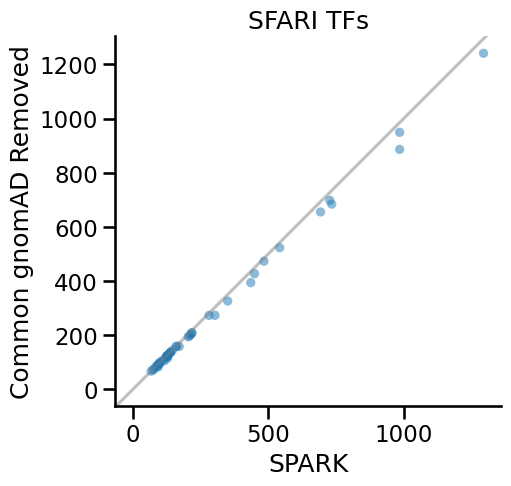

In [54]:
sns.set_context('talk')
g = sns.scatterplot(data = count_results, x = "cds_all_spark", y = "cds_only_spark", alpha = 0.5, s = 45, edgecolor = 'none')
g.axline((0, 0), slope=1, color='gray', ls='solid', alpha = 0.5)

plt.title("Variant Counts, SFARI TFs")
plt.xlabel("SPARK")
plt.ylabel("Common gnomAD Removed")

sns.despine()
plt.gca().set_aspect('equal')
plt.title("SFARI TFs");

In [12]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [13]:
def plot_log_regplot_and_eq(data, x, y, log = True, scatter_color = sns.color_palette("tab10")[0], line_color = "gray", text_x = 0.1, text_y = 0.9):
    sns.set_context('talk')
    g = sns.regplot(data = data, x = x, y = y, 
                    scatter_kws = {'alpha' : 0.5, 's' : 20, 'color' : scatter_color}, 
                    line_kws = {'alpha' : 1, 'color' : line_color}, label = x.split("_")[0])

    extreme = max(max(data[x]), max(data[y]))
    
    if log:
        plt.xscale('log')
        plt.yscale('log')
    

    plt.gca().set_aspect('equal')
    # g.set_xlim(1, extreme)
    # g.set_ylim(1, extreme)
    
    sns.despine()
    pearson_r, _ = stats.pearsonr(data[x], data[y])

    slope, intercept, r_value, p_value, std_err = stats.linregress(data[x], data[y])
    
    correlation_text = f"Pearson r = {pearson_r:.2f}"
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.text(text_x, text_y, equation, transform=plt.gca().transAxes, fontsize=14, color=scatter_color)
    plt.text(text_x, text_y - 0.3, correlation_text, transform=plt.gca().transAxes, fontsize=14, color=scatter_color)


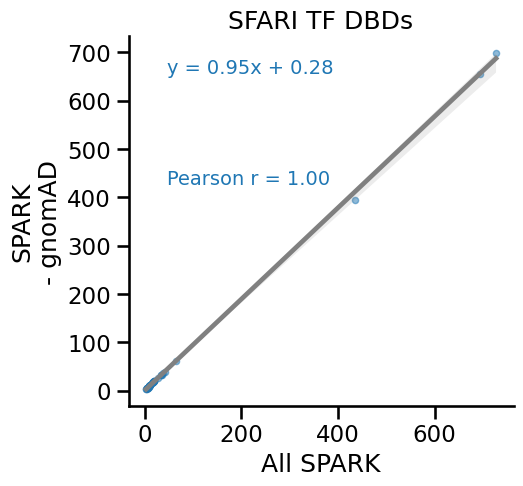

In [14]:
plot_log_regplot_and_eq(count_results, "DBD_all_spark", "DBD_only_spark", log = False)
plt.ylabel("SPARK\n- gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF DBDs");

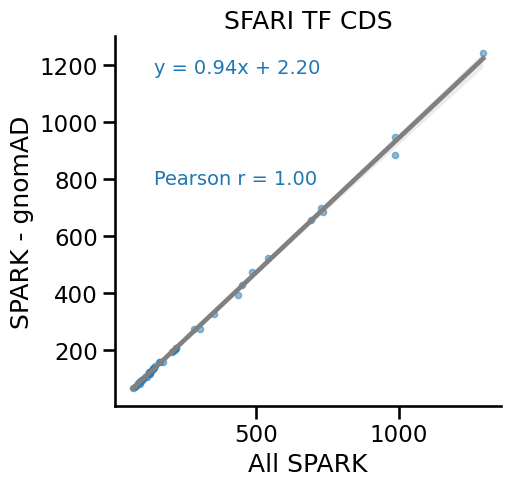

In [15]:
plot_log_regplot_and_eq(count_results, "cds_all_spark", "cds_only_spark", log = False)
plt.ylabel("SPARK - gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF CDS");

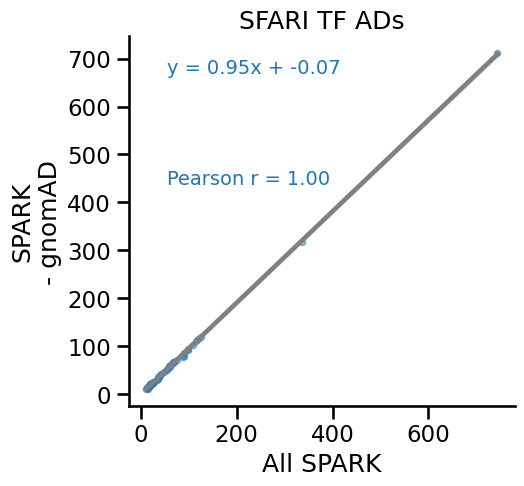

In [16]:
plot_log_regplot_and_eq(count_results, "AD_all_spark", "AD_only_spark", log = False)
plt.ylabel("SPARK\n- gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF ADs");

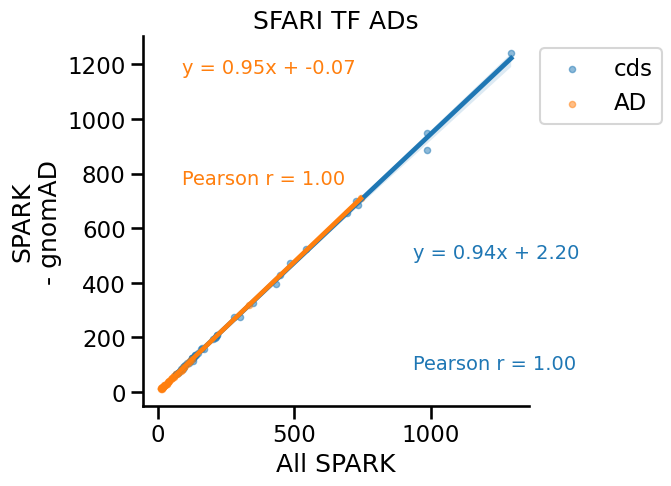

In [17]:
plot_log_regplot_and_eq(count_results, "cds_all_spark", "cds_only_spark", log = False,
                       scatter_color = sns.color_palette("tab10")[0], line_color = sns.color_palette("tab10")[0],
                       text_x = 0.7, text_y = 0.4)
plot_log_regplot_and_eq(count_results, "AD_all_spark", "AD_only_spark", log = False,
                       scatter_color = sns.color_palette("tab10")[1], line_color = sns.color_palette("tab10")[1]
                       )
plt.ylabel("SPARK\n- gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF ADs")

plt.legend()
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))


Running enrichment analysis pipeline

In [18]:
prior_enrich_analysis = pd.read_csv("../outputs/enrichment_analysis_summary_table.csv", index_col = 0)
prior_enrich_analysis

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154,217,0.100743,582,49,0.084192,162,8,0.049383,240,26,0.108333,1.261400e-01
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,171,3,0.017544,198,17,0.085859,4.800899e-01
2,AR,P10275,2763,219,0.079262,2259,182,0.080567,210,9,0.042857,750,88,0.117333,6.488056e-01
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
4,CC2D1A,Q6P1N0,2856,435,0.152311,117,13,0.111111,2853,435,0.152471,0,0,NaN,2.376139e-01
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01
6,EBF3,Q9H4W6,1791,138,0.077052,240,17,0.070833,693,34,0.049062,0,0,NaN,7.951436e-01
7,EGR3,Q06889,1164,101,0.086770,606,61,0.100660,213,12,0.056338,63,1,0.015873,9.507787e-02
8,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,210,27,0.128571,480,60,0.125000,1.394075e-01
9,GLIS1,Q8NBF1,1863,303,0.162641,522,75,0.143678,381,38,0.099738,240,23,0.095833,1.841198e-01


In [19]:
uniprot_ENST = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv", index_col = 0)
uniprot_ENST["ENST"] = uniprot_ENST["ENST"].str.split(".").str[0]
uniprot_ENST

,uniprotID,ENST
0,Q9H2P0,ENST00000349014
1,Q5TGY3,ENST00000247087
2,Q96QS3,ENST00000379044
3,Q96JM3,ENST00000361283
4,Q96RK0,ENST00000575354
...,...,...
117,Q8NEK5,ENST00000366197
118,Q9BR84,ENST00000393883
119,Q68DY1,ENST00000601440
120,Q9Y462,ENST00000276123


In [20]:
count_results = pd.merge(count_results, uniprot_ENST, how = "left")
count_results

,ENST,cds_all_spark,cds_only_spark,AD_all_spark,AD_only_spark,DBD_all_spark,DBD_only_spark,uniprotID
0,ENST00000309446,75,71,27,26,5,5,O75840
1,ENST00000434704,97,93,54,51,11,11,NaN
2,ENST00000318003,435,394,13,13,435,394,Q6P1N0
3,ENST00000262238,90,84,33,29,6,6,P25490
4,ENST00000380013,693,655,60,56,693,655,Q6N021
5,ENST00000288319,128,123,54,52,5,5,P11308
6,ENST00000592199,86,86,16,16,15,15,Q14938
7,ENST00000315869,128,115,90,80,3,3,P19532
8,ENST00000373036,214,202,98,91,18,18,Q14872
9,ENST00000348066,449,427,108,103,18,17,O94983


In [21]:
full_tbl = pd.merge(count_results, prior_enrich_analysis, how = "left")
full_tbl

,ENST,cds_all_spark,cds_only_spark,AD_all_spark,AD_only_spark,DBD_all_spark,DBD_only_spark,uniprotID,gene-symbol,TF_cds_length,...,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ENST00000309446,75,71,27,26,5,5,O75840,KLF7,909.0,...,300.0,27.0,0.090000,219.0,5.0,0.022831,330.0,28.0,0.084848,6.084149e-01
1,ENST00000434704,97,93,54,51,11,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENST00000318003,435,394,13,13,435,394,Q6P1N0,CC2D1A,2856.0,...,117.0,13.0,0.111111,2853.0,435.0,0.152471,0.0,0.0,NaN,2.376139e-01
3,ENST00000262238,90,84,33,29,6,6,P25490,YY1,1245.0,...,288.0,33.0,0.114583,294.0,6.0,0.020408,351.0,9.0,0.025641,2.632369e-03
4,ENST00000380013,693,655,60,56,693,655,Q6N021,TET2,6009.0,...,510.0,60.0,0.117647,6006.0,693.0,0.115385,0.0,0.0,NaN,8.847196e-01
5,ENST00000288319,128,123,54,52,5,5,P11308,ERG,1440.0,...,573.0,54.0,0.094241,240.0,5.0,0.020833,960.0,94.0,0.097917,5.713322e-01
6,ENST00000592199,86,86,16,16,15,15,Q14938,NFIX,1509.0,...,267.0,16.0,0.059925,315.0,15.0,0.047619,0.0,0.0,NaN,7.725409e-01
7,ENST00000315869,128,115,90,80,3,3,P19532,TFE3,1728.0,...,1059.0,90.0,0.084986,162.0,3.0,0.018519,0.0,0.0,NaN,3.017543e-02
8,ENST00000373036,214,202,98,91,18,18,Q14872,MTF1,2262.0,...,891.0,98.0,0.109989,450.0,18.0,0.040000,420.0,42.0,0.100000,4.716823e-02
9,ENST00000348066,449,427,108,103,18,17,O94983,CAMTA2,3609.0,...,882.0,108.0,0.122449,339.0,18.0,0.053097,1167.0,149.0,0.127678,8.604581e-01


In [22]:
full_tbl.columns

Index(['ENST', 'cds_all_spark', 'cds_only_spark', 'AD_all_spark',
       'AD_only_spark', 'DBD_all_spark', 'DBD_only_spark', 'uniprotID',
       'gene-symbol', 'TF_cds_length', 'TF_missense', 'TF_missense_prop',
       'AD_cds_length', 'AD_missense', 'AD_missense_prop', 'DBD_cds_length',
       'DBD_missense', 'DBD_missense_prop', 'RD_cds_length', 'RD_missense',
       'RD_missense_prop', 'ADvsTF_fisher_exact_p_vals'],
      dtype='object')

In [23]:
full_tbl_subset = full_tbl[["gene-symbol", "uniprotID", "TF_cds_length", "cds_only_spark", "AD_cds_length", "AD_only_spark", "DBD_cds_length", "DBD_only_spark"]].dropna().sort_values(by = "gene-symbol")
full_tbl_subset = full_tbl_subset.rename(columns = {"cds_only_spark" : "TF_missense", "AD_only_spark" : "AD_missense", "DBD_only_spark": "DBD_missense"})
full_tbl_subset

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense
15,ARNT2,Q9HBZ2,2154.0,208,582.0,47,162.0,8
27,ARX,Q96QS3,1689.0,144,273.0,20,171.0,3
9,CAMTA2,O94983,3609.0,427,882.0,103,339.0,17
12,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61
2,CC2D1A,Q6P1N0,2856.0,394,117.0,13,2853.0,394
30,EBF3,Q9H4W6,1791.0,136,240.0,17,693.0,32
37,EGR3,Q06889,1164.0,100,606.0,60,213.0,12
5,ERG,P11308,1440.0,123,573.0,52,240.0,5
19,ESR2,Q92731,1593.0,197,1035.0,120,210.0,27
20,GLIS1,Q8NBF1,1863.0,273,522.0,70,381.0,37


In [24]:
full_tbl_subset["TF_missense_prop"] = full_tbl_subset["TF_missense"] / full_tbl_subset["TF_cds_length"]
full_tbl_subset["AD_missense_prop"] = full_tbl_subset["AD_missense"] / full_tbl_subset["AD_cds_length"]
full_tbl_subset["DBD_missense_prop"] = full_tbl_subset["DBD_missense"] / full_tbl_subset["DBD_cds_length"]
full_tbl_subset = full_tbl_subset.reset_index(drop = True)
full_tbl_subset

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop
0,ARNT2,Q9HBZ2,2154.0,208,582.0,47,162.0,8,0.096565,0.080756,0.049383
1,ARX,Q96QS3,1689.0,144,273.0,20,171.0,3,0.085258,0.073260,0.017544
2,CAMTA2,O94983,3609.0,427,882.0,103,339.0,17,0.118315,0.116780,0.050147
3,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61,0.129545,0.167742,0.073939
4,CC2D1A,Q6P1N0,2856.0,394,117.0,13,2853.0,394,0.137955,0.111111,0.138100
5,EBF3,Q9H4W6,1791.0,136,240.0,17,693.0,32,0.075935,0.070833,0.046176
6,EGR3,Q06889,1164.0,100,606.0,60,213.0,12,0.085911,0.099010,0.056338
7,ERG,P11308,1440.0,123,573.0,52,240.0,5,0.085417,0.090750,0.020833
8,ESR2,Q92731,1593.0,197,1035.0,120,210.0,27,0.123666,0.115942,0.128571
9,GLIS1,Q8NBF1,1863.0,273,522.0,70,381.0,37,0.146538,0.134100,0.097113


AD vs TF first

In [25]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(full_tbl_subset, "AD")

display(full_tbl_subset)
decisions = Variant_analysis_helper_functions.benjamini_hochberg(full_tbl_subset["ADvsTF_fisher_exact_p_vals"], 0.1)
sig_output = full_tbl_subset[decisions]
sig_output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154.0,208,582.0,47,162.0,8,0.096565,0.080756,0.049383,1.395910e-01
1,ARX,Q96QS3,1689.0,144,273.0,20,171.0,3,0.085258,0.073260,0.017544,4.797012e-01
2,CAMTA2,O94983,3609.0,427,882.0,103,339.0,17,0.118315,0.116780,0.050147,9.046151e-01
3,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61,0.129545,0.167742,0.073939,1.372196e-02
4,CC2D1A,Q6P1N0,2856.0,394,117.0,13,2853.0,394,0.137955,0.111111,0.138100,4.929693e-01
5,EBF3,Q9H4W6,1791.0,136,240.0,17,693.0,32,0.075935,0.070833,0.046176,8.957084e-01
6,EGR3,Q06889,1164.0,100,606.0,60,213.0,12,0.085911,0.099010,0.056338,1.160182e-01
7,ERG,P11308,1440.0,123,573.0,52,240.0,5,0.085417,0.090750,0.020833,5.644432e-01
8,ESR2,Q92731,1593.0,197,1035.0,120,210.0,27,0.123666,0.115942,0.128571,2.028747e-01
9,GLIS1,Q8NBF1,1863.0,273,522.0,70,381.0,37,0.146538,0.134100,0.097113,3.814439e-01


,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
3,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61,0.129545,0.167742,0.073939,1.372196e-02
17,MEIS2,O14770,1434.0,135,414.0,65,174.0,4,0.094142,0.157005,0.022989,7.018212e-07
21,NCOA1,Q15788,4326.0,473,1230.0,110,168.0,11,0.109339,0.089431,0.065476,8.096565e-03
25,NKX2-2,O95096,822.0,105,162.0,31,171.0,10,0.127737,0.191358,0.058480,8.672750e-03
27,NR4A2,P43354,1797.0,157,318.0,16,210.0,9,0.087368,0.050314,0.042857,8.434207e-03
32,RORA,P35398,1572.0,137,342.0,14,210.0,6,0.087150,0.040936,0.028571,3.195577e-04
38,TCF7L2,Q9NQB0,1860.0,194,300.0,17,207.0,6,0.104301,0.056667,0.028986,2.619200e-03
43,YY1,P25490,1245.0,84,288.0,29,294.0,6,0.067470,0.100694,0.020408,1.520195e-02


In [77]:
sig_output.sort_values(by = "ADvsTF_fisher_exact_p_vals")[["gene-symbol"]]

,gene-symbol
17,MEIS2
32,RORA
38,TCF7L2
21,NCOA1
27,NR4A2
25,NKX2-2
3,CASZ1
43,YY1


In [26]:
# multiple genes have enriched AD vs TF!

---
AD vs DBD

In [27]:
contains_DBD = full_tbl_subset[full_tbl_subset["DBD_cds_length"] != 0]
contains_DBD = contains_DBD.reset_index(drop = True)
contains_DBD

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154.0,208,582.0,47,162.0,8,0.096565,0.080756,0.049383,1.395910e-01
1,ARX,Q96QS3,1689.0,144,273.0,20,171.0,3,0.085258,0.073260,0.017544,4.797012e-01
2,CAMTA2,O94983,3609.0,427,882.0,103,339.0,17,0.118315,0.116780,0.050147,9.046151e-01
3,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61,0.129545,0.167742,0.073939,1.372196e-02
4,CC2D1A,Q6P1N0,2856.0,394,117.0,13,2853.0,394,0.137955,0.111111,0.138100,4.929693e-01
5,EBF3,Q9H4W6,1791.0,136,240.0,17,693.0,32,0.075935,0.070833,0.046176,8.957084e-01
6,EGR3,Q06889,1164.0,100,606.0,60,213.0,12,0.085911,0.099010,0.056338,1.160182e-01
7,ERG,P11308,1440.0,123,573.0,52,240.0,5,0.085417,0.090750,0.020833,5.644432e-01
8,ESR2,Q92731,1593.0,197,1035.0,120,210.0,27,0.123666,0.115942,0.128571,2.028747e-01
9,GLIS1,Q8NBF1,1863.0,273,522.0,70,381.0,37,0.146538,0.134100,0.097113,3.814439e-01


In [28]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(contains_DBD, "AD", "DBD")

[[47, 8], [535.0, 154.0]]
[[20, 3], [253.0, 168.0]]
[[103, 17], [779.0, 322.0]]
[[78, 61], [387.0, 764.0]]
[[13, 394], [104.0, 2459.0]]
[[17, 32], [223.0, 661.0]]
[[60, 12], [546.0, 201.0]]
[[52, 5], [521.0, 235.0]]
[[120, 27], [915.0, 183.0]]
[[70, 37], [452.0, 344.0]]
[[317, 17], [2275.0, 265.0]]
[[35, 10], [211.0, 269.0]]
[[36, 20], [234.0, 235.0]]
[[25, 19], [107.0, 200.0]]
[[26, 5], [274.0, 214.0]]
[[24, 5], [396.0, 139.0]]
[[59, 5], [1102.0, 139.0]]
[[65, 4], [349.0, 170.0]]
[[14, 15], [88.0, 156.0]]
[[91, 18], [800.0, 432.0]]
[[67, 20], [755.0, 532.0]]
[[110, 11], [1120.0, 157.0]]
[[93, 33], [507.0, 156.0]]
[[11, 17], [238.0, 298.0]]
[[16, 15], [251.0, 300.0]]
[[31, 10], [131.0, 161.0]]
[[86, 12], [748.0, 201.0]]
[[16, 9], [302.0, 201.0]]
[[66, 9], [483.0, 162.0]]
[[11, 9], [154.0, 366.0]]
[[41, 18], [415.0, 528.0]]
[[22, 9], [128.0, 162.0]]
[[14, 6], [328.0, 204.0]]
[[39, 8], [888.0, 298.0]]
[[711, 11], [5001.0, 106.0]]
[[18, 39], [222.0, 531.0]]
[[114, 698], [867.0, 5182.0]]
[

In [29]:
contains_DBD.sort_values(by = "ADvsDBD_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals
3,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61,0.129545,0.167742,0.073939,1.372196e-02,3.412341e-07
17,MEIS2,O14770,1434.0,135,414.0,65,174.0,4,0.094142,0.157005,0.022989,7.018212e-07,4.363587e-07
11,IKZF1,Q13422,1560.0,160,246.0,35,279.0,10,0.102564,0.142276,0.035842,2.950247e-02,1.473750e-05
43,YY1,P25490,1245.0,84,288.0,29,294.0,6,0.067470,0.100694,0.020408,1.520195e-02,3.662404e-05
19,MTF1,Q14872,2262.0,202,891.0,91,450.0,18,0.089302,0.102132,0.040000,9.672855e-02,4.878124e-05
7,ERG,P11308,1440.0,123,573.0,52,240.0,5,0.085417,0.090750,0.020833,5.644432e-01,1.374483e-04
30,PAX6,P26367,1269.0,91,456.0,41,546.0,18,0.071710,0.089912,0.032967,6.935315e-02,2.162331e-04
25,NKX2-2,O95096,822.0,105,162.0,31,171.0,10,0.127737,0.191358,0.058480,8.672750e-03,2.164869e-04
2,CAMTA2,O94983,3609.0,427,882.0,103,339.0,17,0.118315,0.116780,0.050147,9.046151e-01,3.513011e-04
20,MYT1L,Q9UL68,3561.0,273,822.0,67,552.0,20,0.076664,0.081509,0.036232,5.502568e-01,6.391597e-04


In [30]:
contains_DBD_sig = Variant_analysis_helper_functions.return_bh_sig(contains_DBD, "ADvsDBD_fisher_exact_p_vals", 0.1)
contains_DBD_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals
1,ARX,Q96QS3,1689.0,144,273.0,20,171.0,3,0.085258,0.073260,0.017544,4.797012e-01,8.433192e-03
2,CAMTA2,O94983,3609.0,427,882.0,103,339.0,17,0.118315,0.116780,0.050147,9.046151e-01,3.513011e-04
3,CASZ1,Q86V15,5280.0,684,465.0,78,825.0,61,0.129545,0.167742,0.073939,1.372196e-02,3.412341e-07
7,ERG,P11308,1440.0,123,573.0,52,240.0,5,0.085417,0.090750,0.020833,5.644432e-01,1.374483e-04
10,HIVEP3,Q5T1R4,7221.0,886,2592.0,317,282.0,17,0.122698,0.122299,0.060284,9.701790e-01,1.196114e-03
11,IKZF1,Q13422,1560.0,160,246.0,35,279.0,10,0.102564,0.142276,0.035842,2.950247e-02,1.473750e-05
13,KLF16,Q9BXK1,759.0,115,132.0,25,219.0,19,0.151515,0.189394,0.086758,1.833262e-01,7.249221e-03
14,KLF7,O75840,909.0,71,300.0,26,219.0,5,0.078108,0.086667,0.022831,5.125116e-01,2.295908e-03
17,MEIS2,O14770,1434.0,135,414.0,65,174.0,4,0.094142,0.157005,0.022989,7.018212e-07,4.363587e-07
19,MTF1,Q14872,2262.0,202,891.0,91,450.0,18,0.089302,0.102132,0.040000,9.672855e-02,4.878124e-05


In [31]:
# Multiple genes have enriched ADs relative to DBDs!

In [78]:
contains_DBD_sig.sort_values(by = "ADvsDBD_fisher_exact_p_vals")[["gene-symbol"]]

,gene-symbol
3,CASZ1
17,MEIS2
11,IKZF1
43,YY1
19,MTF1
7,ERG
30,PAX6
25,NKX2-2
2,CAMTA2
20,MYT1L
